# Lab Title: Python Implementation for efficient Database cleaning and Data Preperation
# Objective: - 
# 1. to utilize the data preprocessing technique
# 2. to enhance the feature enhancing process

In [1]:
import pandas as pd

#Sample dictionary to create a DataFrame
data = {
    'ID': [1, 2, 3, 4, 5, 2, 7, 8, 1],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Bob', 'Grace', 'Hannah', 'Alice'],
    'Age': [23, 38, 25, 35, 28, 30, 22, 24, 23],
    'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoneix', 'Los Angeles', 'san Francisco', 'Seattle', 'New York']    
}

# Create DataFrame
df=pd.DataFrame(data)

#show Dataframe
print("Orignal Dataframe")
print(df)

#Identify dulicate rows based on all columns
duplicate=df[df.duplicated()]

#show the duplicate rows
print("\nDuplicate Rows")
print(duplicate)

Orignal Dataframe
   ID     Name  Age           City
0   1    Alice   23       New York
1   2      Bob   38    Los Angeles
2   3  Charlie   25        Chicago
3   4    David   35        Houston
4   5      Eva   28        Phoneix
5   2      Bob   30    Los Angeles
6   7    Grace   22  san Francisco
7   8   Hannah   24        Seattle
8   1    Alice   23       New York

Duplicate Rows
   ID   Name  Age      City
8   1  Alice   23  New York


In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df1 = pd.read_csv('Titanic.csv')
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df1.info()

# From the above data info, we can see that Age and Cabin have an unequal nummber of counts.
# And some of the columns are categorical and have data type objects and some are integer and float values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Checking the Categorical and Numerical Columns.

# Categorical columns
cat_col = [col for col in df1.columns if df1[col].dtype == 'object']
print('Categorical columns :', cat_col)

# Numerical Columns

num_col = [col for col in df1.columns if df1[col].dtype != 'object']
print('Numerical columns :', num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [5]:
# Checking the total number of Unique Values in the Categorical Columns
df1[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [6]:
# Analyzing the "Ticket" Columns
df1['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [7]:
# Dropping IrreLevant Columns
df2=df1.drop(columns=['Name', 'Ticket'])
df2.shape

# Reason for Dropping:

# 1. Names are Likely unique for each individual and don't provide meaningful information information for predicting the target variable (e.g., survival).
# 2. Keeping it adds unnecessary complexity without benefiting the model.

# 3. Ticket values are categorical text data that need extensive preprocessing to extract useful features.
# 4. If such preprocessing isn't planned, it's better to drop this column to simplify the dataset

(891, 10)

In [8]:
# Handling Missing data 

# Checking the % missing values columns-wise for each row using df.isnull()
# which checks whether the values are null or not and gives returns boolean values

round((df2.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
# As we can see from the above result that Cabin has 77% null values and Age has 19.87% and Embarked has 0.22% of null values.
# So, it's not a good idea to fill 77% null values. So, we will drop the Cabin column.
# Embarked column has only 0.22% of null values so, we drop the null values rows of Embarked column
df3 = df2.drop(columns='Cabin')
df3.dropna(subset=['Embarked'], axis=0, inplace=True)
df3.shape

(889, 9)

In [10]:
## Inputting The missing values from post observations 
# We can use Mean imputation or Median imputations for the case.

# Note: 
  #Mean imputation is suitable when the data is normally distributed and has no extreme outliers.
  #Median imputation is preferable when the data contains outliers or is skewed.

# Mean imputation
df4 = df3.fillna(df3.Age.mean())

# Let's check the null values again 
df4.isnull().sum()  

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

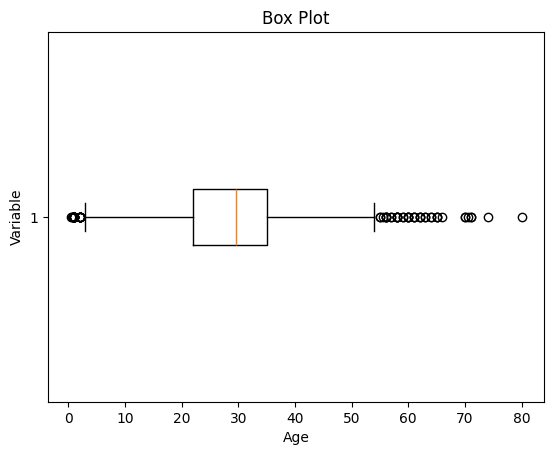

In [11]:
## Handling Outliers

# To check the outliers, A box plot, also referred ta as a box-and-whisker plot 
# It is a graphical representation of a dataset's distributing Outliers
# Individual points beyond the whiskers are considered potential outliers

import matplotlib.pyplot as plt

plt.boxplot(df4['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [12]:
df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [13]:
#As wee can see from the above box and wisker plot ,our age dataset has outliers values.
#the value less than 5 and more than 55 are outliers

# calculat the summary statistics
mean= df4['Age'].mean()
std= df4['Age'].std()

#calcullate the lower bound and upper bounds
lower_bound =  mean - std*2
upper_bound =  mean + std*2

print('lower_Bound :',lower_bound)
print('upper_bound :',upper_bound)

#drop the outliers
df5=df4[(df4['Age']>=lower_bound) & (df4['Age'] <= upper_bound) ]

lower_Bound : 3.7054001079256587
upper_bound : 55.57878528533277


In [14]:
##Data transfermation 
# it involves converting  the data from one form to another
#To make it more sutable for the analysis
#Technque such as normalization,scaling, & encoding can be use to transform the data
X = df4[['Pclass',	'Sex',	'Age'	,'SibSp',	'Parch',	'Fare'	,'Embarked']]
Y = df4['Survived']

In [15]:
#Min-Max ScaLing: Min-Max scaling rescales the values to a specified range, #typically between @ and 1.
#It preserves the original distribution and ensures that the minimum value #maps to 0 and the maximum value maps to 1.
from sklearn.preprocessing import MinMaxScaler

# initializing the MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

#Numerical columns
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X

#Learning the statistical parameters for each of the data and transforming
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5124\4251346278.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.271174,0.125,0.0,0.014151,S
1,0.0,female,0.472229,0.125,0.0,0.139136,C
2,1.0,female,0.321438,0.000,0.0,0.015469,S
3,0.0,female,0.434531,0.125,0.0,0.103644,S
4,1.0,male,0.434531,0.000,0.0,0.015713,S
